<a href="https://colab.research.google.com/github/yibesh/DeepLearning/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


*   Filter (Kernel): Small 3×3 grid that slides across the image to detect patterns like edges or corners.

*   Convolution: The process of applying the filter to extract features

*   Pooling: Reduces image size and keeps important features (makes training faster).

*   Flatten: Converts the 2D features into a 1D list for the dense layers.

*   Dense (Fully Connected): Learns to combine features to make the final classification.










In [11]:
# Simple CNN example for beginners using the MNIST dataset

# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# ------------------------------------------------------------
# 1. Load and preprocess the MNIST dataset
# ------------------------------------------------------------
# MNIST is a dataset of handwritten digits (0–9)
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()


In [13]:
X_train.shape

(60000, 28, 28)

In [14]:
y_train.shape

(60000,)

In [15]:
X_test.shape

(10000, 28, 28)

In [16]:
y_test.shape

(10000,)

We have following with us:

Training Set

60000 images
Each image is of the shape 28 x 28 (rows x columns)
60000 labels defining the digit that corresponds to the respective image

Test Set

10000 images
Each image is of the shape 28 x 28 (rows x columns)
10000 labels defining the digit that corresponds to the respective image
Dataset Visualization



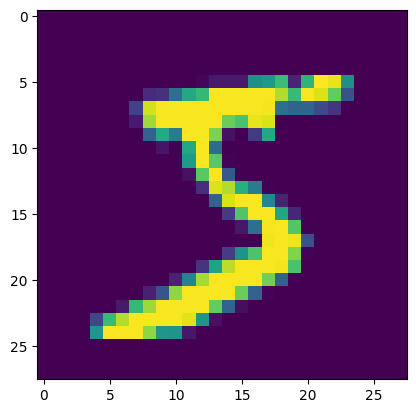

In [18]:
#Let us visualize the handwritten digit images and labels for 0th training sample. We can see that the 0th image shows a handwritten 5 and the 0th label has the value 5.

import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [20]:
y_train[0]

np.uint8(5)

In [21]:
# CNN expects input in 4D: (samples, height, width, channels)
# The images are 28x28 pixels, and since they are grayscale → 1 channel
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)) / 255.0  # Normalize to [0,1]
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)) / 255.0     # Normalize to [0,1]

In [29]:
# ------------------------------------------------------------
# 2. Build the CNN model
# ------------------------------------------------------------
model = models.Sequential([
    # First convolution layer: detects features like edges
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)), # - 32 filters (feature detectors), - Each filter is 3x3 in size, - Stride = 1 (moves one pixel at a time)
    #layers.Conv2D(filters=64, kernel_size=(2,2),strides=(1, 1), padding='same', activation='relu', input_shape=(28,28,1)))
    #layers.Dropout(0.3))

    # Pooling layer: reduces image size to keep important features only
    # Reduces image size by half → makes training faster and avoids overfitting
    layers.MaxPooling2D((2,2)), #  - Takes the maximum value in each 2x2 region,

    # Second convolution layer: detects more complex patterns
    # Learns more detailed features (like curves, edges, corners)
    layers.Conv2D(64, (3,3), activation='relu'), # 64 filters, each of size 3x3

    # Another pooling layer for Again reduces the spatial dimension
    layers.MaxPooling2D((2,2)),

    # Flatten: convert 2D feature maps to 1D vector for dense layers
    layers.Flatten(), #Needed before feeding into Dense (fully connected) layers

    # Fully connected layer (dense): learns relationships between features
    #Each neuron connects to every neuron from the previous layer
    #Learns combinations of features to make better predictions
    layers.Dense(64, activation='relu'), # 64 neurons

    # Output layer: 10 neurons for 10 digit classes (0–9)
    layers.Dense(10, activation='softmax') #Softmax converts outputs to probabilities for each class
])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# ------------------------------------------------------------
# 3. Compile the model
# ------------------------------------------------------------
# Choose optimizer, loss function, and performance metric
model.compile(
    optimizer='adam', # Adam optimizer → adjusts learning rate automatically
    loss='sparse_categorical_crossentropy',  # Sparse categorical crossentropy → suitable for integer labels (0–9)
    metrics=['accuracy']
)

In [24]:
# ------------------------------------------------------------
# 4. Train the model
# ------------------------------------------------------------
# Train for 10 epochs (complete passes through training data)
history = model.fit(
    X_train, y_train,
    epochs=5,
    validation_data=(X_test, y_test)  # check performance on test data
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 25ms/step - accuracy: 0.9012 - loss: 0.3266 - val_accuracy: 0.9851 - val_loss: 0.0474
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.9843 - loss: 0.0499 - val_accuracy: 0.9876 - val_loss: 0.0394
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 24ms/step - accuracy: 0.9900 - loss: 0.0310 - val_accuracy: 0.9852 - val_loss: 0.0442
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 26ms/step - accuracy: 0.9924 - loss: 0.0231 - val_accuracy: 0.9893 - val_loss: 0.0352
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.9940 - loss: 0.0179 - val_accuracy: 0.9906 - val_loss: 0.0310
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 25ms/step - accuracy: 0.9958 - loss: 0.0124 - val_accuracy: 0.9901 - val_loss: 0.0349
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.9968 - loss: 0.0095 - val_accuracy: 0.9889 - val_loss: 0.0397
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 26ms/step - accuracy: 0.9975 -

In [25]:
# ------------------------------------------------------------
# 5. Evaluate the model
# ------------------------------------------------------------
# Test the model on unseen test data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest Accuracy: {test_acc:.4f}")

313/313 - 3s - 10ms/step - accuracy: 0.9903 - loss: 0.0387

Test Accuracy: 0.9903


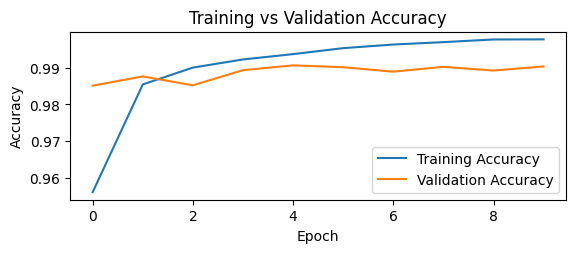

In [30]:

# ------------------------------------------------------------
# 6. Visualize training accuracy
# ------------------------------------------------------------
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


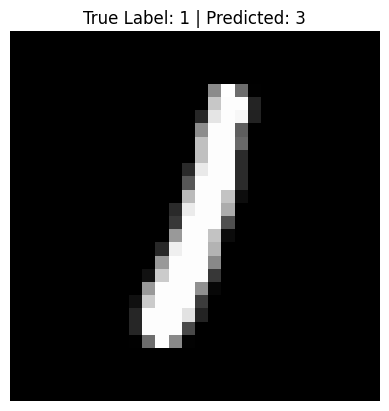

In [31]:
# 7. Show a Sample Classification
# ------------------------------------------------------------
# Pick one random image from test set
index = np.random.randint(0, len(X_test))
sample_image = X_test[index]
true_label = y_test[index]

# Predict the class for this image
prediction = model.predict(sample_image.reshape(1, 28, 28, 1))
predicted_label = np.argmax(prediction)

# Display the image and prediction result
plt.imshow(sample_image.reshape(28, 28), cmap='gray')
plt.title(f"True Label: {true_label} | Predicted: {predicted_label}")
plt.axis('off')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


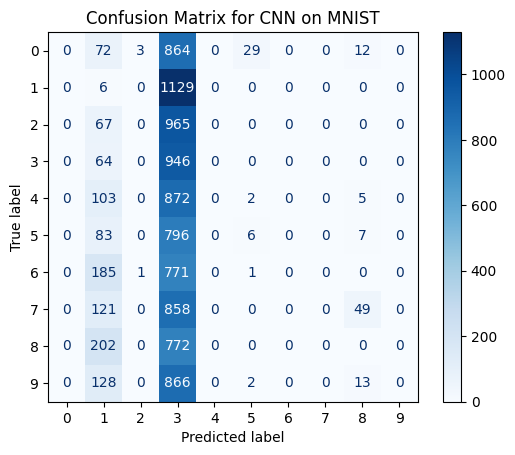

In [32]:
# ------------------------------------------------------------
# 8. Confusion Matrix
# ------------------------------------------------------------
# Get model predictions for test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1) # Convert probabilities to label numbers

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for CNN on MNIST")
plt.show()

In [ ]:
## Method 2

In [7]:
# using a data set https://www.kaggle.com/datasets/oddrationale/mnist-in-csv

This version contains:

mnist_train.csv (60,000 samples)

mnist_test.csv (10,000 samples)

Each row = 1 image

Column 0 → label (digit 0–9)

Columns 1–784 → pixel values (28×28 flattened)

You can easily open this CSV in Python or Excel to see how the data and annotations look.

In [8]:
import pandas as pd

# Load training data
train = pd.read_csv('mnist_train.csv')
test = pd.read_csv('mnist_test.csv')

# Show first few rows
print(train.head())

# Separate features and labels
X_train = train.iloc[:, 1:].values.reshape(-1, 28, 28)
y_train = train.iloc[:, 0].values


FileNotFoundError: [Errno 2] No such file or directory: 'mnist_train.csv'